In [ ]:
pip install pandas seaborn matplotlib gradio ollama

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic Dataset
url = (r"/Users/shashi/Desktop/titanic_ dataset_final.csv")
df = pd.read_csv(url)
print(df)



     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [8]:
# Display dataset info
print(df.describe()) 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
# Missing Values Check
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


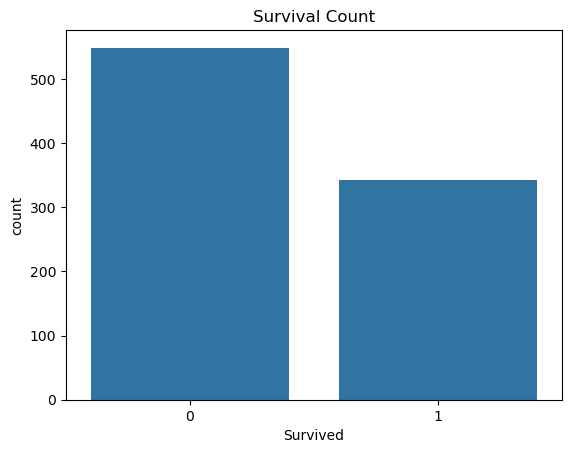

In [10]:
# Survival Rate Visualization
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

In [11]:
import ollama

def generate_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print("\n🔹 AI-Generated Insights:\n", insights)


🔹 AI-Generated Insights:
  This dataset appears to be a subset of the Titanic passenger data, which includes information about passengers who boarded the RMS Titanic on its maiden voyage in 1912. Here are some key insights from the summary statistics:

1. Total number of unique PassengerIDs is 891, suggesting that there were 891 passengers aboard the ship. The mean and standard deviation (std) for PassengerID is 446 and 257.35 respectively, indicating a relatively even distribution among the passengers but with a significant range in values.

2. The mean Survived column is approximately 0.38, which suggests that slightly less than half of the passengers survived. The minimum value is 0 (indicating they did not survive), and the maximum value is 1 (indicating they did survive).

3. The Pclass variable represents the passenger's traveling class: First (1), Second (2), or Third (3). The mean Pclass is around 2.3, suggesting that a majority of passengers were in second-class, with a stand

In [12]:
import gradio as gr

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# Create Web Interface
demo = gr.Interface(fn=eda_analysis, inputs="file", outputs="text", title="AI-Powered EDA with Mistral")

# Launch App
demo.launch(share=True)  # Use share=True for Google Colab


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://0f56d0f3b79049c322.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
